In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from mlxtend.plotting import plot_decision_regions
from sklearn.datasets import make_classification, make_moons
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, cross_val_predict

from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [2]:
def generate_classification_reports(X, y, classifier_dict):
    # generate classification reports for classifiers 
    for classifier, classifier_name in zip(classifier_dict.values(), classifier_dict.keys()):
        y_pred = cross_val_predict(classifier, X, y, cv=10)
        print(f'Classification Report for {classifier_name}')
        print(classification_report(y, y_pred), '\n')

def visualize_decision_boundaries(X, y, classifier_dict):
    # fit classifiers using the entire dataset and visualize decision boundaries
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
    for classifier, classifier_name, axis in zip(classifier_dict.values(), classifier_dict.keys(), axes.flatten()):
        classifier.fit(X, y)
        plot_decision_regions(X, y, classifier, hide_spines=False, ax=axis)
        axis.set_title(f'Decision Boundary for {classifier_name}')
        axis.set_xlabel('x1')
        axis.set_ylabel('x2')

    plt.subplots_adjust(wspace=0.25, hspace=0.25)

In [3]:
classifier_dict = {
    'Naive Bayes': GaussianNB(),
    'LDA': LinearDiscriminantAnalysis(),
    'QDA': QuadraticDiscriminantAnalysis(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'kNN': KNeighborsClassifier(n_neighbors=3)
}

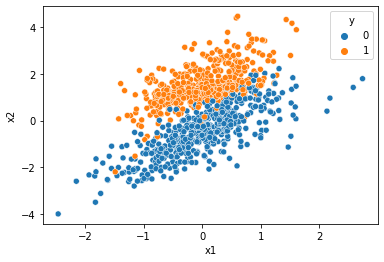

In [4]:
X, y = make_classification(
    n_samples=1000, 
    n_features=2, 
    n_redundant=0, 
    n_clusters_per_class=2, 
    class_sep=2.5, 
    hypercube=False,
    random_state=12
)

make_classification_data = pd.DataFrame({'x1': X[:, 0], 'x2': X[:, 1], 'y':y})
make_classification_scatter = sns.scatterplot(data=make_classification_data, x='x1', y='x2', hue='y')
plt.show()

In [5]:
generate_classification_reports(X, y, classifier_dict)

Classification Report for Naive Bayes
              precision    recall  f1-score   support

           0       0.92      0.83      0.87       501
           1       0.85      0.93      0.88       499

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.88      0.88      0.88      1000
 

Classification Report for LDA
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       501
           1       0.93      0.97      0.95       499

    accuracy                           0.95      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000
 

Classification Report for QDA
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       501
           1       0.94      0.96      0.95       499

    accuracy                           0.95      1000
   macro avg       0.95   

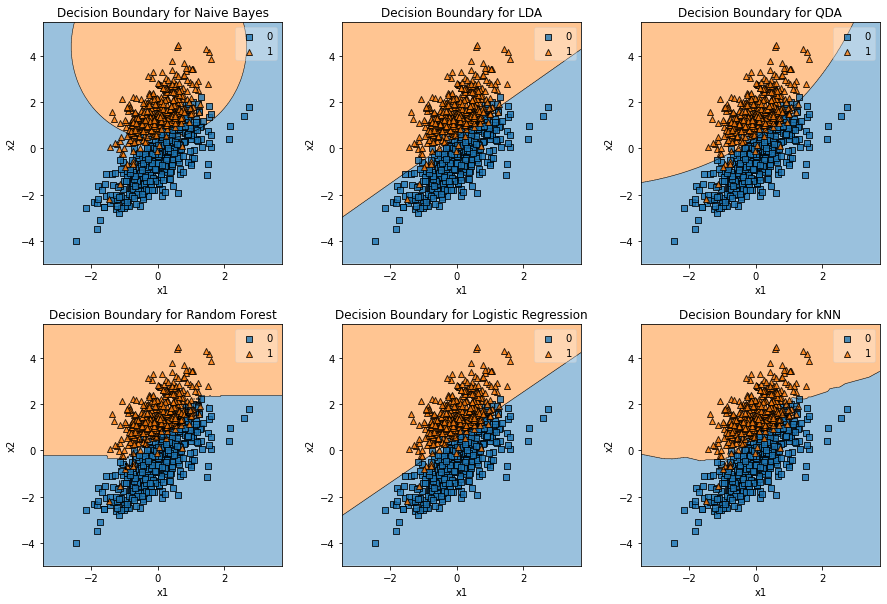

In [6]:
visualize_decision_boundaries(X, y, classifier_dict)

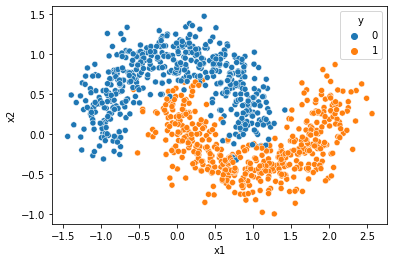

In [7]:
X_moon, y_moon = make_moons(
    n_samples=1000, 
    noise = 0.20,
    random_state=42
)

make_moon_data = pd.DataFrame({'x1': X_moon[:, 0], 'x2': X_moon[:, 1], 'y': y_moon})
make_moon_scatter = sns.scatterplot(data=make_moon_data, x='x1', y='x2', hue='y')
plt.show()

In [8]:
generate_classification_reports(X_moon, y_moon, classifier_dict)

Classification Report for Naive Bayes
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       500
           1       0.86      0.87      0.86       500

    accuracy                           0.86      1000
   macro avg       0.86      0.86      0.86      1000
weighted avg       0.86      0.86      0.86      1000
 

Classification Report for LDA
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       500
           1       0.86      0.87      0.86       500

    accuracy                           0.86      1000
   macro avg       0.86      0.86      0.86      1000
weighted avg       0.86      0.86      0.86      1000
 

Classification Report for QDA
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       500
           1       0.86      0.87      0.86       500

    accuracy                           0.86      1000
   macro avg       0.86   

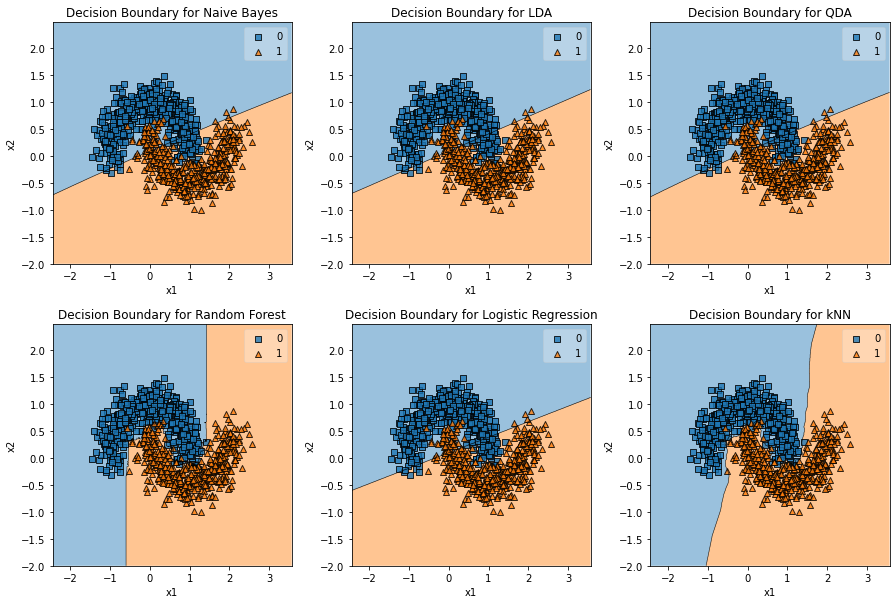

In [9]:
visualize_decision_boundaries(X_moon, y_moon, classifier_dict)